<div align='left' style="width:400px;height:120px;overflow:hidden;">
<a href='http://www.uff.br'>
<img align='left' style='display: block;height: 92%' src='https://github.com/lmarti/jupyter_custom/raw/master/imgs/uff.png' alt='UFF logo' title='UFF logo'/>
</a>
<a href='http://www.ic.uff.br'>
<img align='left' style='display: block;height: 100%' src='https://github.com/lmarti/jupyter_custom/raw/master/imgs/logo-ic.png' alt='IC logo' title='IC logo'/>
</a>
</div>

# Elements of Evolutionary Algorithms

## Luis Martí, [IC](http://www.ic.uff.br)/[UFF](http://www.uff.br)

[http://lmarti.com](http://lmarti.com); [lmarti@ic.uff.br](mailto:lmarti@ic.uff.br) 

[Advanced Evolutionary Computation: Theory and Practice](http://lmarti.com/aec-2014) 

The notebook is better viewed rendered as slides. You can convert it to slides and view them by:
- using [nbconvert](http://ipython.org/ipython-doc/1/interactive/nbconvert.html) with a command like:
  ```bash
  $ ipython nbconvert --to slides --post serve <this-notebook-name.ipynb>
  ```
- installing [Reveal.js - Jupyter/IPython Slideshow Extension](https://github.com/damianavila/live_reveal)
- using the online [IPython notebook slide viewer](https://slideviewer.herokuapp.com/) (some slides of the notebook might not be properly rendered).

This and other related IPython notebooks can be found at the course github repository:
* [https://github.com/lmarti/evolutionary-computation-course](https://github.com/lmarti/evolutionary-computation-course)

## In this demonstration class we will deal with the features and problems shared by most evolutionary algorithms.

*Note*: Most of the material used in this notebook comes from [DEAP](https://github.com/DEAP/deap) documentation.

## Elements to take into account using evolutionary algorithms

* **Individual representation** (binary, Gray, floating-point, etc.);
* **evaluation** and **fitness assignment**;
* **mating selection**, that establishes a partial order of individuals in the population using their fitness function value as reference and determines the degree at which individuals in the population will take part in the generation of new (offspring) individuals.
* **variation**, that applies a range of evolution-inspired operators, like crossover, mutation, etc., to synthesize offspring individuals from the current (parent) population. This process is supposed to prime the fittest individuals so they play a bigger role in the generation of the offspring.
* **environmental selection**, that merges the parent and offspring individuals to produce the population that will be used in the next iteration. This process often involves the deletion of some individuals using a given criterion in order to keep the amount of individuals bellow a certain threshold.
* **stopping criterion**, that determines when the algorithm shoulod be stopped, either because the optimum was reach or because the optimization process is not progressing.

# Hence a 'general' evolutionary algorithm can be described as

```python
def evolutionary_algorithm():
    'Pseudocode of an evolutionary algorithm'    
    populations = [] # a list with all the populations
    
    populations[0] =  initialize_population(pop_size)
    t = 0
    
    while not stop_criterion(populations[t]):
        fitnesses = evaluate(populations[t])
        offspring = matting_and_variation(populations[t],
                                          fitnesses)
        populations[t+1] = environmental_selection(           
                                          populations[t],
                                          offspring)
        t = t+1
```

# Python libraries for evolutionary computation

* PaGMO/PyGMO
* Inspyred
* **Distributed Evolutionary Algorithms in Python (DEAP)**

> There are potentially many more, feel free to give me some feedback on this.

<table>
<tr>
<td width='47%'>
<img src='https://raw.githubusercontent.com/DEAP/deap/master/doc/_static/deap_long.png' title="DEAP logo" width='92%' align='center'/>
</td>
<td>
<ul>
<li> Open source Python library with,
<li> genetic algorithm using any representation;
<li> evolutionary strategies (including CMA-ES);
<li> multi-objective optimization from the start;
<li> co-evolution (cooperative and competitive) of multiple populations;
<li> parallelization of the evaluations (and more) using SCOOP;
<li> statistics keeping, and;
<li> benchmarks module containing some common test functions.
<li> [https://github.com/DEAP/deap](https://github.com/DEAP/deap)
</ul>
</td>
</tr>
</table>

# Lets start with an example and analyze it

## The One Max problem

* Maximize the number of ones in a binary string (list, vector, etc.).
* More formally, from the set of binary strings of length $n$,
$$\mathcal{S}=\left\{s_1,\ldots,s_n\right\}, \text{ with } s_i=\left\{0,1\right\}.$$
* Find $s^\ast\in\mathcal{S}$ such that
$$s^\ast = \operatorname*{arg\,max}_{s\in\mathcal{S}} \sum_{i=1}^{n}{s_i}.$$
* Its clear that the optimum is an *all-ones* string.

# Coding the problem

In [1]:
import random
from deap import algorithms, base, creator, tools

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] ='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

In [3]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [4]:
def evalOneMax(individual):
    return (sum(individual),)

# Defining the elements 

In [5]:
toolbox = base.Toolbox()

In [6]:
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

In [7]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Running the experiment

In [8]:
pop = toolbox.population(n=300)

Lets run only 10 generations

In [9]:
result = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, 
                             ngen=10, verbose=False)

In [10]:
print('Current best fitness:', evalOneMax(tools.selBest(pop, k=1)[0]))

Current best fitness: (83,)


In [11]:
result = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, 
                             ngen=50, verbose=False)

In [12]:
print('Current best fitness:', evalOneMax(tools.selBest(pop, k=1)[0]))

Current best fitness: (100,)


# Essential features

* `deap.creator`: meta-factory allowing to create classes that will fulfill the needs of your evolutionary algorithms.
* `deap.base.Toolbox`: A toolbox for evolution that contains the evolutionary operators. You may populate the toolbox with any other function by using the `register()` method
* `deap.base.Fitness([values])`: The fitness is a measure of quality of a solution. If values are provided as a tuple, the fitness is initalized using those values, otherwise it is empty (or invalid). You should inherit from this class to define your custom fitnesses.

# Defining an individual
First import the required modules and register the different functions required to create individuals that are a list of floats with a minimizing two objectives fitness.

In [13]:
import random

from deap import base
from deap import creator
from deap import tools

In [14]:
IND_SIZE = 5

In [15]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox1 = base.Toolbox()
toolbox1.register("attr_float", random.random)
toolbox1.register("individual", tools.initRepeat, creator.Individual,
                 toolbox1.attr_float, n=IND_SIZE)

/Users/lm/anaconda/lib/python3.6/site-packages/deap-1.1.0-py3.6-macosx-10.7-x86_64.egg/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


The first individual can now be built

In [16]:
ind1 = toolbox1.individual()

Printing the individual ind1 and checking if its fitness is valid will give something like this

In [17]:
print(ind1)

[0.2989651981634037, 0.9689899788264542, 0.3524509946515799, 0.06381306368762452, 0.4555534543646952]


In [18]:
print(ind1.fitness.valid)

False


The individual is printed as its base class representation (here a list) and the fitness is invalid because it contains no values.

# Evaluation
The evaluation is the most "personal" part of an evolutionary algorithm
* it is the only part of the library that you must write yourself. 
* A typical evaluation function takes one individual as argument and return its fitness as a tuple. 
* A fitness is a list of floating point values and has a property valid to know if this individual shall be re-evaluated. 
* The fitness is set by setting the values to the associated tuple.

For example, the following evaluates the previously created individual ind1 and assign its fitness to the corresponding values.

In [19]:
def evaluate(individual):
    # Do some hard computing on the individual
    a = sum(individual)
    b = len(individual)
    return a, 1. / b

In [20]:
ind1.fitness.values = evaluate(ind1)

In [21]:
print(ind1.fitness.valid)

True


In [22]:
print(ind1.fitness)

(2.139772689693758, 0.2)


Dealing with single objective fitness is not different, the evaluation function must return a tuple because single-objective is treated as a special case of multi-objective.

# Mutation
* The next kind of operator that we will present is the mutation operator. 
* There is a variety of mutation operators in the deap.tools module. 
* Each mutation has its own characteristics and may be applied to different type of individual. 
* Be careful to read the documentation of the selected operator in order to avoid undesirable behaviour.

The general rule for mutation operators is that they only mutate, this means that an independent copy must be made prior to mutating the individual if the original individual has to be kept or is a reference to an other individual (see the selection operator).

In order to apply a mutation (here a gaussian mutation) on the individual ind1, simply apply the desired function.

In [23]:
mutant = toolbox1.clone(ind1)
ind2, = tools.mutGaussian(mutant, mu=0.0, sigma=0.2, indpb=0.2)
del mutant.fitness.values

The fitness’ values are deleted because they not related to the individual anymore. As stated above, the mutation does mutate and only mutate an individual it is not responsible of invalidating the fitness nor anything else. The following shows that ind2 and mutant are in fact the same individual.

In [24]:
ind2 is mutant

True

In [25]:
mutant is ind2

True

# Crossover

* There is a variety of crossover operators in the `deap.tools module`. 
* Each crossover has its own characteristics and may be applied to different type of individuals. 
* Be careful to read the documentation of the selected operator in order to avoid undesirable behaviour.

The general rule for crossover operators is that they only mate individuals, this means that an independent copies must be made prior to mating the individuals if the original individuals have to be kept or is are references to other individuals (see the selection operator).

Lets apply a crossover operation to produce the two children that are cloned beforehand.

In [26]:
child1, child2 = [toolbox1.clone(ind) for ind in (ind1, ind2)]
tools.cxBlend(child1, child2, 0.5)
del child1.fitness.values
del child2.fitness.values

# Selection
* Selection is made among a population by the selection operators that are available in the deap.operators module. 
* The selection operator usually takes as first argument an iterable container of individuals and the number of individuals to select. It returns a list containing the references to the selected individuals. 

The selection is made as follow.

In [27]:
selected = tools.selBest([child1, child2], 2)
child1 in selected

True

# Using the Toolbox
* The toolbox is intended to contain all the evolutionary tools, from the object initializers to the evaluation operator. 
* It allows easy configuration of each algorithms. 
* The toolbox has basically two methods, `register()` and `unregister()`, that are used to add or remove tools from the toolbox.
* The usual names for the evolutionary tools are mate(), mutate(), evaluate() and select(), however, any name can be registered as long as it is unique. Here is how they are registered in the toolbox.

In [28]:
from deap import base
from deap import tools

toolbox1 = base.Toolbox()

def evaluateInd(individual):
    # Do some computation
    return result,

toolbox1.register("mate", tools.cxTwoPoint)
toolbox1.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox1.register("select", tools.selTournament, tournsize=3)
toolbox1.register("evaluate", evaluateInd)

# Tool Decoration
* A powerful feature that helps to control very precise thing during an evolution without changing anything in the algorithm or operators. 
* A decorator is a wrapper that is called instead of a function.
* It is asked to make some initialization and termination work before and after the actual function is called. 

For example, in the case of a constrained domain, one can apply a decorator to the mutation and crossover in order to keep any individual from being out-of-bound. 

The following defines a decorator that checks if any attribute in the list is out-of-bound and clips it if it is the case. 
* The decorator is defined using three functions in order to receive the min and max arguments. 
* Whenever the mutation or crossover is called, bounds will be check on the resulting individuals.

In [29]:
def checkBounds(min, max):
    def decorator(func):
        def wrapper(*args, **kargs):
            offspring = func(*args, **kargs)
            for child in offspring:
                for i in xrange(len(child)):
                    if child[i] > max:
                        child[i] = max
                    elif child[i] < min:
                        child[i] = min
            return offspring
        return wrapper
    return decorator

toolbox.register("mate_example", tools.cxBlend, alpha=0.2)
toolbox.register("mutate_example", tools.mutGaussian, mu=0, sigma=2)

MIN = 0; MAX = 10

toolbox.decorate("mate_example", checkBounds(MIN, MAX))
toolbox.decorate("mutate_example", checkBounds(MIN, MAX))

This will work on crossover and mutation because both return a tuple of individuals. The mutation is often considered to return a single individual but again like for the evaluation, the single individual case is a special case of the multiple individual case.

# Variations

* Variations allows to build simple algorithms using predefined small building blocks. 
* In order to use a variation, the toolbox must be set to contain the required operators. 

> For example, in the lastly presented complete algorithm, the crossover and mutation are regrouped in the `varAnd()` function, this function requires the toolbox to contain the `mate()` and `mutate()` functions. The variations can be used to simplify the writing of an algorithm as follow.


In [30]:
from deap import algorithms

NGEN = 20 # number of generations
CXPB = 0.6
MUTPB = 0.05

for g in range(NGEN):
    # Select and clone the next generation individuals
    offspring = map(toolbox.clone, toolbox.select(pop, len(pop)))

    # Apply crossover and mutation on the offspring
    offspring = algorithms.varAnd(offspring, toolbox, CXPB, MUTPB)

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # The population is entirely replaced by the offspring
    pop[:] = offspring

# Algorithms
* There are several algorithms implemented in the algorithms module. 
* They are very simple and reflect the basic types of evolutionary algorithms present in the literature. 
* The algorithms use a Toolbox as defined in the last sections. 
* In order to setup a toolbox for an algorithm, you must register the desired operators under a specified names, refer to the documentation of the selected algorithm for more details. 
* Once the toolbox is ready, it is time to launch the algorithm.

The *simple evolutionary algorithm* takes 5 arguments, a population, a toolbox, a probability of mating each individual at each generation (`cxpb`), a probability of mutating each individual at each generation (`mutpb`) and a number of generations to accomplish (`ngen`).

In [31]:
from deap import algorithms

result = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50)

gen	nevals
0  	0     
1  	176   
2  	171   
3  	177   
4  	188   
5  	197   
6  	170   
7  	175   
8  	178   
9  	178   
10 	190   
11 	183   
12 	169   
13 	189   
14 	187   
15 	161   
16 	175   
17 	155   
18 	179   
19 	171   
20 	182   
21 	187   
22 	175   
23 	170   
24 	207   
25 	173   
26 	176   
27 	196   
28 	216   
29 	167   
30 	173   
31 	182   
32 	167   
33 	188   
34 	179   
35 	203   
36 	162   
37 	174   
38 	191   
39 	179   
40 	183   
41 	190   
42 	187   
43 	204   
44 	193   
45 	177   
46 	191   
47 	170   
48 	161   
49 	158   
50 	194   


# Computing Statistics
Often, one wants to compile statistics on what is going on in the optimization. The Statistics are able to compile such data on arbitrary attributes of any designated object. To do that, one need to register the desired statistic functions inside the stats object using the exact same syntax as the toolbox.

In [32]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

The statistics object is created using a key as first argument. This key must be supplied a function that will later be applied to the data on which the statistics are computed. The previous code sample uses the fitness.values attribute of each element.

In [33]:
import numpy
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

* The statistical functions are now registered. 
* The register function expects an alias as first argument and a function operating on vectors as second argument. 
* Any subsequent argument is passed to the function when called. The creation of the statistics object is now complete.

# Predefined Algorithms
When using a predefined algorithm such as `eaSimple()`, `eaMuPlusLambda()`, `eaMuCommaLambda()`, or `eaGenerateUpdate()`, the statistics object previously created can be given as argument to the algorithm.

In [34]:
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=0, 
                                   stats=stats, verbose=True)

gen	nevals	avg 	std    	min	max
0  	0     	98.8	2.47521	88 	100


* Statistics will automatically be computed on the population every generation. 
* The verbose argument prints the statistics on screen while the optimization takes place.
* Once the algorithm returns, the final population and a Logbook are returned. 
* See the next section or the Logbook documentation for more information.

# Writing Your Own Algorithm

When writing your own algorithm, including statistics is very simple. One need only to compile the statistics on the desired object. 

For example, compiling the statistics on a given population is done by calling the compile() method.

In [35]:
record = stats.compile(pop)

The argument to the compile function must be an iterable of elements on which the key will be called. Here, our population (`pop`) contains individuals.

* The statistics object will call the key function on every individual to retrieve their `fitness.values` attribute. 
* The resulting array of values is finally given the each statistic function and the result is put into the record dictionary under the key associated with the function. 
* Printing the record reveals its nature.


In [36]:
print(record)

{'avg': 98.799999999999997, 'std': 2.4752104287649295, 'min': 88.0, 'max': 100.0}


# Logging Data
Once the data is produced by the statistics, one can save it for further use in a Logbook. 

* The logbook is intended to be a chronological sequence of entries (as dictionaries). 
* It is directly compliant with the type of data returned by the statistics objects, but not limited to this data. 
* *In fact, anything can be incorporated in an entry of the logbook.*

In [37]:
logbook = tools.Logbook()
logbook.record(gen=0, evals=30, **record)

The `record()` method takes a variable number of argument, each of which is a data to be recorded. In the last example, we saved the generation, the number of evaluations and everything contained in the record produced by a statistics object using the star magic. All record will be kept in the logbook until its destruction.

After a number of records, one may want to retrieve the information contained in the logbook.

In [38]:
gen, avg = logbook.select("gen", "avg")

The `select()` method provides a way to retrieve all the information associated with a keyword in all records. This method takes a variable number of string arguments, which are the keywords used in the record or statistics object. Here, we retrieved the generation and the average fitness using a single call to select.

# Printing to Screen
* A logbook can be printed to screen or file. 
* Its `__str__()` method returns a header of each key inserted in the first record and the complete logbook for each of these keys. 
* The row are in chronological order of insertion while the columns are in an undefined order. 
* The easiest way to specify an order is to set the header attribute to a list of strings specifying the order of the columns.

In [39]:
logbook.header = "gen", "avg", "spam"

The result is:

In [40]:
print(logbook)

gen	avg 	spam
0  	98.8	    


# Plotting Features
* One of the most common operation when an optimization is finished is to plot the data during the evolution. 
* The `Logbook` allows to do this very efficiently. 
* Using the select method, one can retrieve the desired data and plot it using matplotlib.

In [41]:
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, 
                                   stats=stats, verbose=False)

In [42]:
gen = logbook.select("gen")
fit_mins = logbook.select("min")
size_avgs = logbook.select("avg")

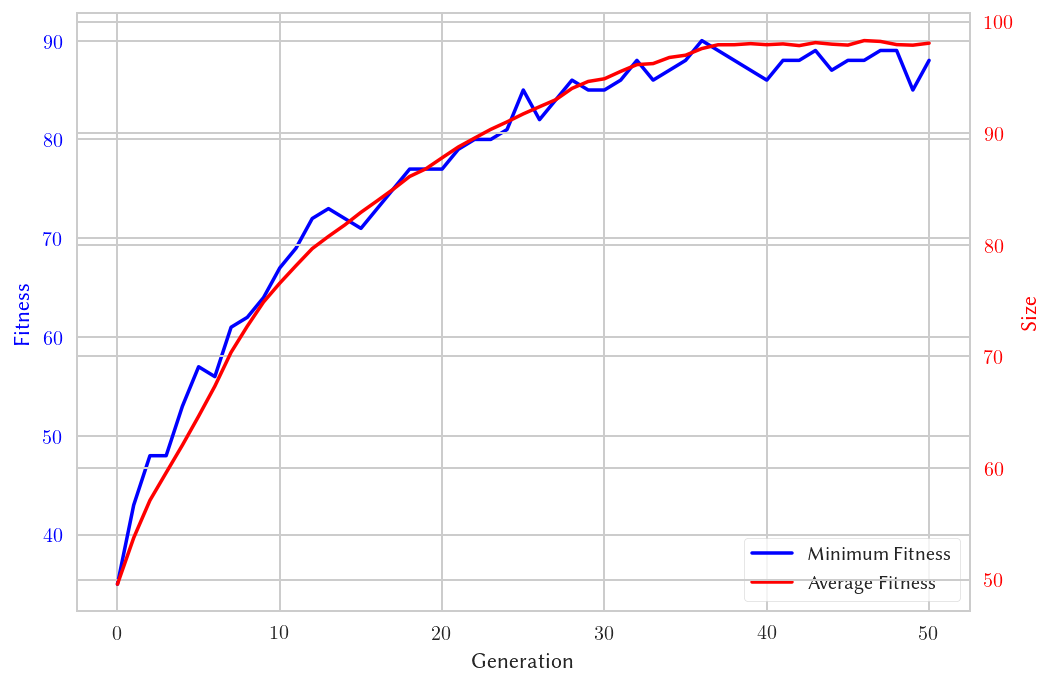

In [43]:
fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
ax2.set_ylabel("Size", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="lower right", frameon=True)

plt.show()

# Constraint Handling

We have already seen some alternatives.

* **Penality functions** are the most basic way of handling constrains for individuals that cannot be evaluated or are forbiden for problem specific reasons, when falling in a given region. 
* The penality function gives a fitness disavantage to theses individuals based on the amount of constraint violation in the solution.

<img src='http://deap.readthedocs.org/en/master/_images/constraints.png' width='92%'/>

In DEAP, a penality function can be added to any evaluation function using the DeltaPenality decorator provided in the tools module.

In [44]:
from math import sin
from deap import base
from deap import tools

def evalFct(individual):
    """Evaluation function for the individual."""
    x = individual[0]
    return (x - 5)**2 * sin(x) * (x/3),

def feasible(individual):
    """Feasability function for the individual. Returns True if feasible False
    otherwise."""
    if 3 < individual[0] < 5:
        return True
    return False

def distance(individual):
    """A distance function to the feasability region."""
    return (individual[0] - 5.0)**2

toolbox = base.Toolbox()
toolbox.register("evaluate", evalFct)
toolbox.decorate("evaluate", tools.DeltaPenality(feasible, 7.0, distance))

<hr/>
<div class="container-fluid">
  <div class='well'>
      <div class="row">
          <div class="col-md-3" align='center'>
              <img align='center'alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png"/>
          </div>
          <div class="col-md-9">
              This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/).
          </div>
      </div>
  </div>
</div>

In [45]:
# To install run: pip install version_information
%load_ext version_information
%version_information scipy, numpy, matplotlib, seaborn, deap

Software versions
Python 3.6.0 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
IPython 5.2.2
OS Darwin 16.4.0 x86_64 i386 64bit
scipy 0.18.1
numpy 1.11.3
matplotlib 2.0.0
seaborn 0.7.1
deap 1.1
Sat Mar 04 03:52:24 2017 BRT

In [46]:
# this code is here for cosmetic reasons
from IPython.core.display import HTML
from urllib.request import urlopen
HTML(urlopen('https://raw.githubusercontent.com/lmarti/jupyter_custom/master/custom.include').read().decode('utf-8'))